# FORMULARIO EXAMEN FINAL

# ÍNDICE

- [TEMA 1: Configuración y Visualización del Entorno](#tema-1-configuración-y-visualización-del-entorno)
    - [1.1 Configuración de las Rutas de Importación](#11-configuración-de-las-rutas-de-importación)
    - [1.2 Verificación de las Versiones de los Paquetes](#12-verificación-de-las-versiones-de-los-paquetes)
    - [1.3 Visualización de Imágenes](#13-visualización-de-imágenes)
    - [1.4 Importación de Paquetes](#14-importación-de-paquetes)
- [ANEXO: Convertir Jupyter Notebook a Fichero Python](#anexo-convertir-jupyter-notebook-a-fichero-python)
    - [A.1 Script en el Directorio Actual](#a1-script-en-el-directorio-actual)
    - [A.2 Script en el Directorio Padre](#a2-script-en-el-directorio-padre)

# TEMA 1: Configuración y Visualización del Entorno

## 1.1 Configuración de las Rutas de Importación

Se añade el directorio padre (..) al path (sys.path), lo que permite al entorno de Python acceder a módulos o paquetes ubicados en directorios superiores al actual. Esto es útil para poder importar scripts o paquetes personalizados sin tener que mover ficheros o el directorio de trabajo.

In [1285]:
import sys
sys.path.insert(0, '..')

## 1.2 Verificación de las Versiones de los Paquetes

Se utiliza la función check_packages() para verificar que los paquetes y sus respectivas versiones indicadas en el diccionario 'd' estén instalados correctamente dentro del entorno. Este paso es importante para verificar la compatibilidad de cada paquete para poder evitar errores por diferencia de versión.

In [1286]:
from python_environment_check import check_packages
d = {
    'numpy': '1.21.2',
    'matplotlib': '3.4.3',
    'sklearn': '1.0',
    'pandas': '1.3.2'
}
check_packages(d)

[OK] numpy 1.24.3
[OK] matplotlib 3.5.1
[OK] sklearn 1.5.2
[OK] pandas 2.2.2


## 1.3 Visualización de Imágenes

Se utiliza display de IPython.display para renderizar una imagen en HTML.

In [1287]:
from IPython.display import Image, HTML

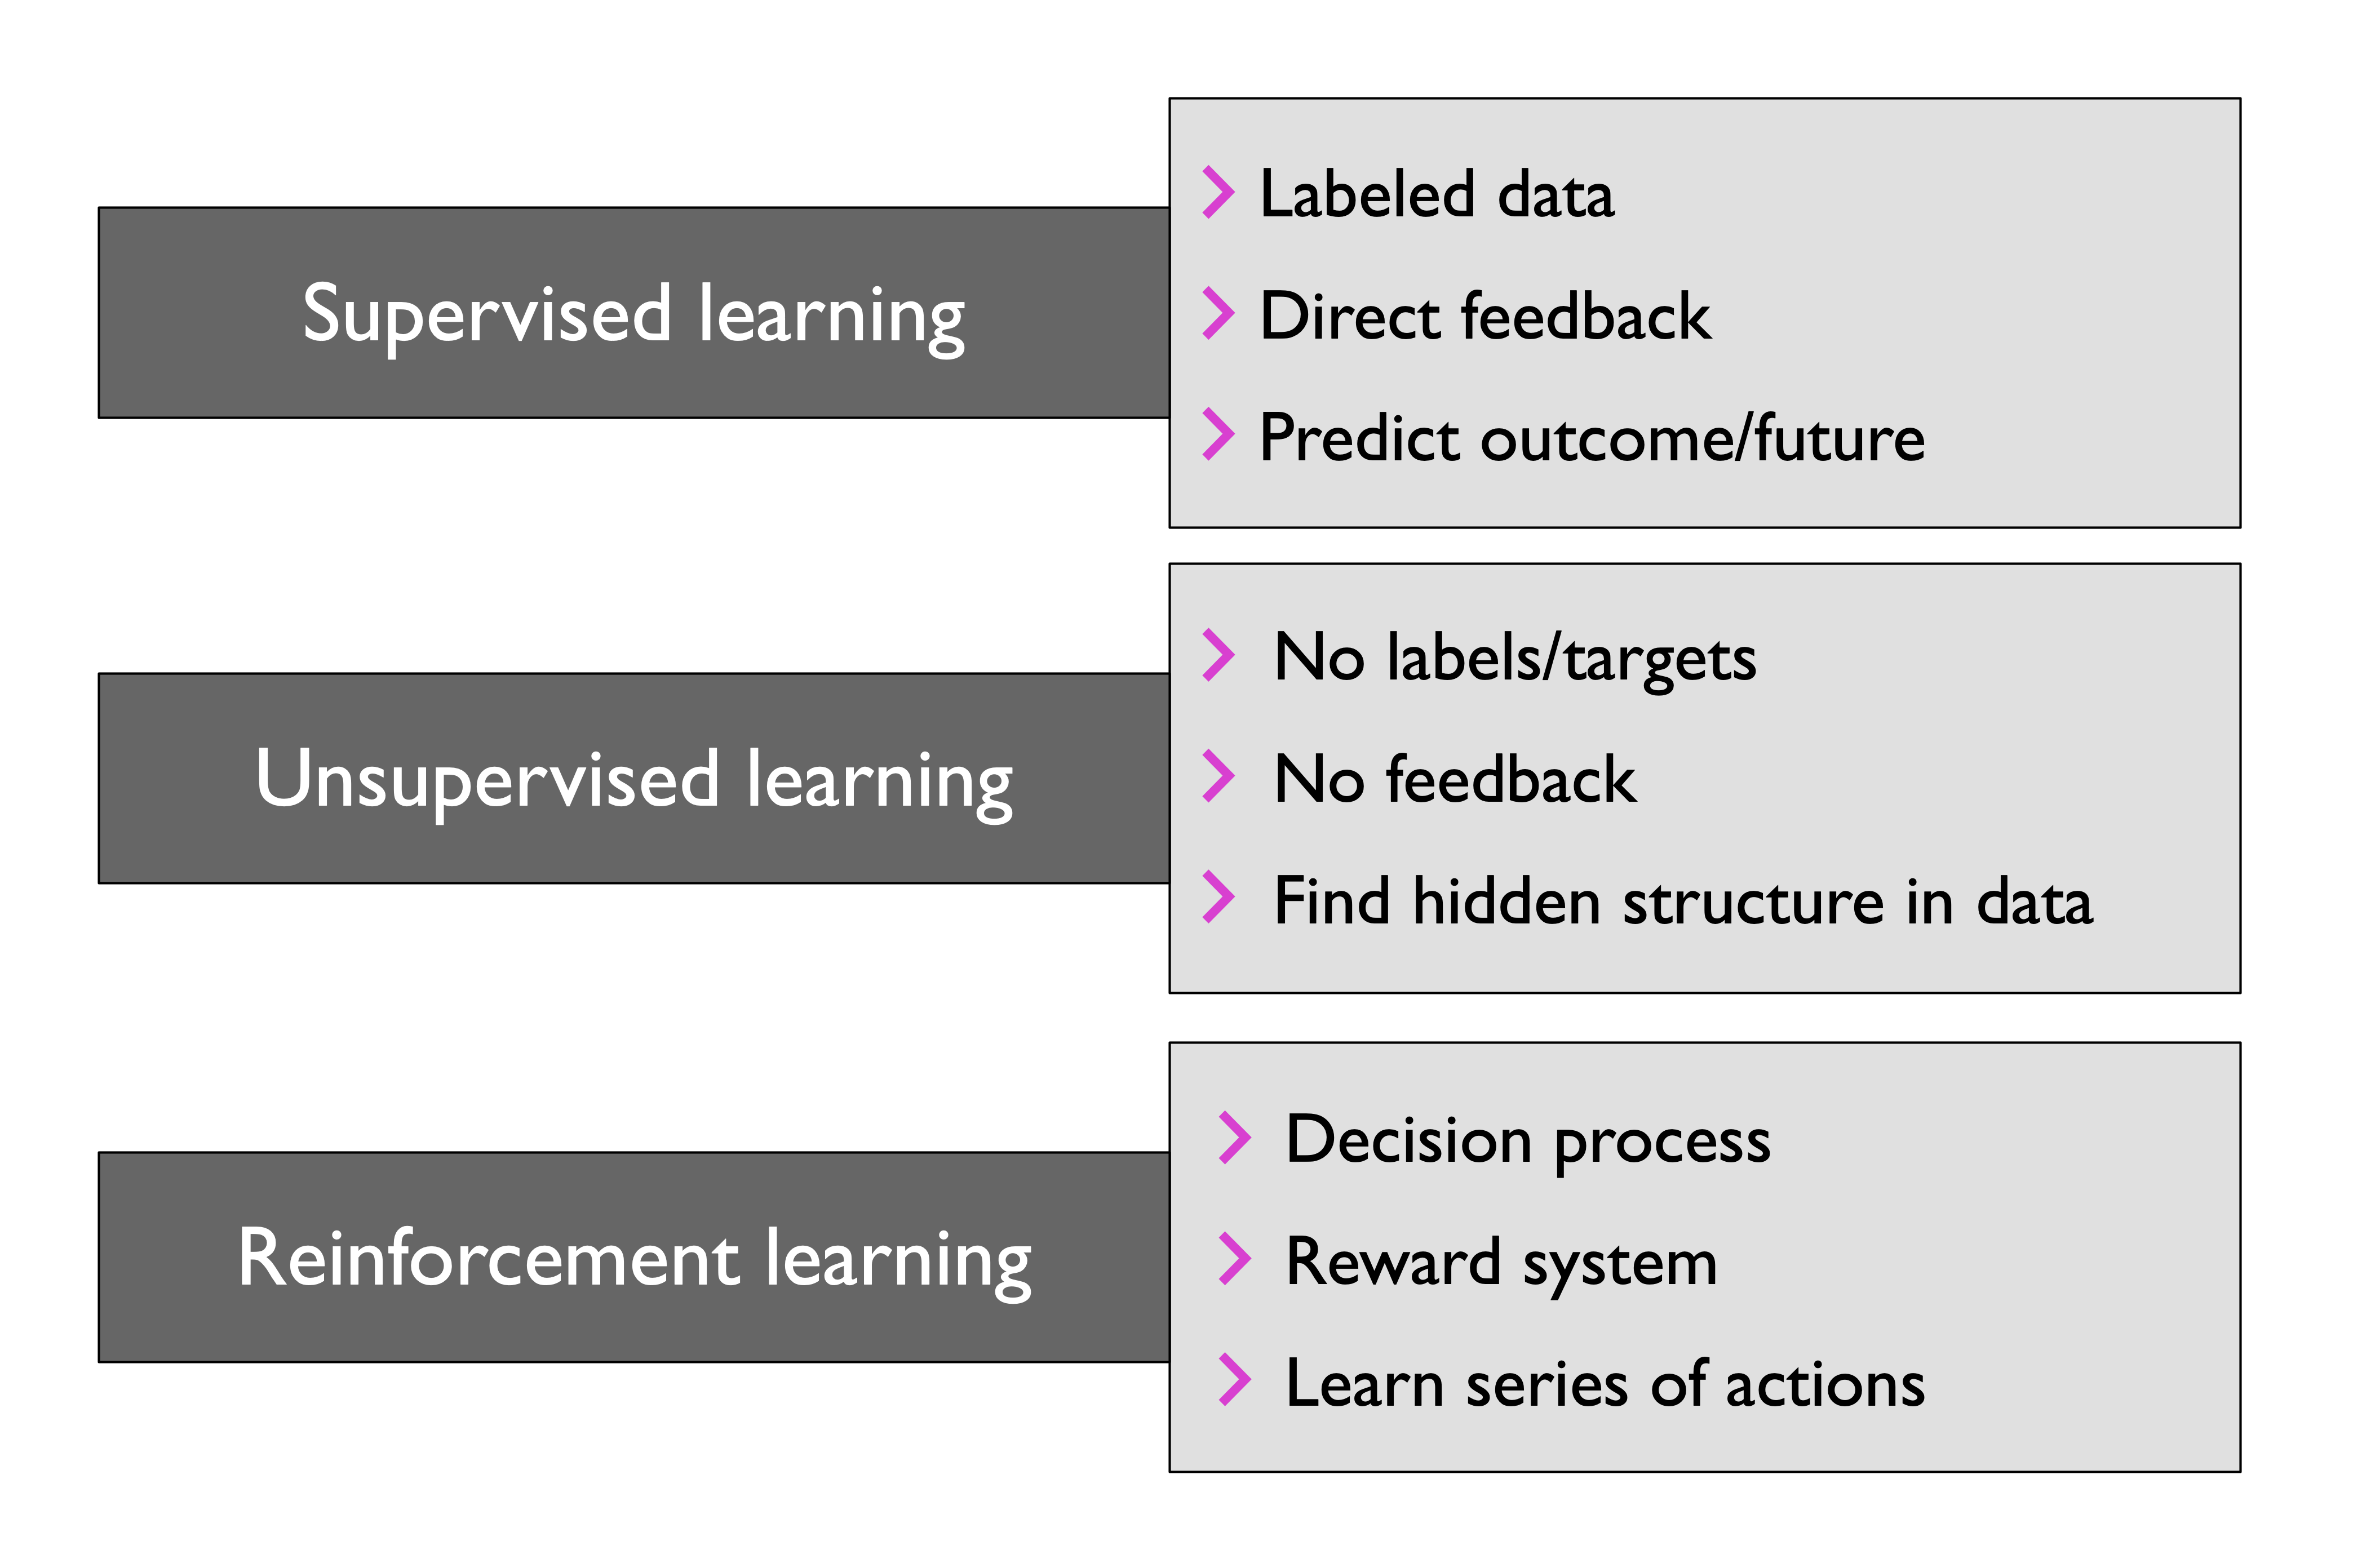

In [1288]:
Image(filename='./figures/01_01.png', width=500)

Este código genera un contenedor div centrado, que muestra una imagen con unas dimensiones específicas. Esto es útil para insertar gráficos u otras figuras en el Notebook, lo que facilita la visualización de resultados o ejemplos.

In [1289]:
display(HTML("""
<div style="display: flex; justify-content: center;">
    <img src="./figures/01_01.png" width="500" height="300" format="png">
</div>
"""))

## 1.4 Importación de Paquetes

Se importan los paquetes esenciales para analizar y visualizar datos: numpy para cálculos numéricos, pandas para manipular datos y matplotlib.pyplot para visualizar gráficos.

In [1290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TEMA 2: Análisis Exploratorio de Datos (Compresión de Datos y Reducción Dimensional)

## 2.1 Carga y Exploración Inicial del Dataset

En primer lugar, se carga el dataset 'dataset_compression.csv' y se configura la visualización de todas sus columnas. Además, se exploran las características más importantes del dataset como las columnas, su forma, una muestra de los primeros registros, así como un resumen de la información general y otras estadísticas descriptivas.

In [1291]:
# PÁGINA 142
df = pd.read_csv('dataset_compression.csv')
# ----------

pd.set_option('display.max_columns', len(df.columns))

df.columns
df.shape
df.head(1)
df.info()
df.describe()
# dataset.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Col7    768 non-null    float64
 1   Col5    768 non-null    float64
 2   Col2    768 non-null    int64  
 3   Col4    768 non-null    int64  
 4   Col8    768 non-null    int64  
 5   Col3    768 non-null    int64  
 6   Col6    768 non-null    int64  
 7   Col1    768 non-null    int64  
 8   Target  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Col7,Col5,Col2,Col4,Col8,Col3,Col6,Col1,Target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,31.992578,0.471876,33.240885,3.845052,20.536458,120.894531,69.105469,79.799479,0.348958
std,7.884160,0.331329,11.760232,3.369578,15.952218,31.972618,19.355807,115.244002,0.476951
min,0.000000,0.078000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.300000,0.243750,24.000000,1.000000,0.000000,99.000000,62.000000,0.000000,0.000000
50%,32.000000,0.372500,29.000000,3.000000,23.000000,117.000000,72.000000,30.500000,0.000000
75%,36.600000,0.626250,41.000000,6.000000,32.000000,140.250000,80.000000,127.250000,1.000000
max,67.100000,2.420000,81.000000,17.000000,99.000000,199.000000,122.000000,846.000000,1.000000


ANÁLISIS DE LOS RESULTADOS

El dataset contiene un total de 9 columnas y 768 filas. La exploración inicial revela la media, la desviación estándar, el mínimo, el máximo y los cuartiles de cada columna, lo que permite observar detalladamente la dispersión y la distribución de los datos, además de poder detectar problemas como valores nulos o distribuciones atípicas que puedan afectar al análsis posterior.

## 2.2 Anonimización y Cálculo de la Correlación entre Características

Una vez realizado el primer análisis general de los datos, se elimina la columna 'Target' para crear un dataset anonimizado (dataset_compression_anonymized), el cual se guarda en un fichero con el mismo nombre. Después, se calcula la matriz de correlación, que permite evaluar relaciones lineales entre las columnas.

In [1292]:
# USANDO TODAS LAS CARACTERÍSTICAS DE LOS DATOS
dataset_compression_anonymized = df.drop(["Target"], axis=1)
dataset_compression_anonymized.to_csv('dataset_compression_anonymized.csv', index=False)
dataset_compression_anonymized.corr()

# USANDO N CARACTERÍSTICAS DE LOS DATOS
# dataset_compression_anonymized = df.drop(["Target"], axis=1)
# dataset_N_characteristics = dataset_compression_anonymized.drop(['Col1', 'Col2', ..., 'ColN'], axis=1)
# dataset_N_characteristics.to_csv('dataset_N_characteristics.csv', index=False)
# dataset_N_characteristics.corr()

,Col7,Col5,Col2,Col4,Col8,Col3,Col6,Col1
Col7,1.000000,0.140647,0.036242,0.017683,0.392573,0.221071,0.281805,0.197859
Col5,0.140647,1.000000,0.033561,-0.033523,0.183928,0.137337,0.041265,0.185071
Col2,0.036242,0.033561,1.000000,0.544341,-0.113970,0.263514,0.239528,-0.042163
Col4,0.017683,-0.033523,0.544341,1.000000,-0.081672,0.129459,0.141282,-0.073535
Col8,0.392573,0.183928,-0.113970,-0.081672,1.000000,0.057328,0.207371,0.436783
Col3,0.221071,0.137337,0.263514,0.129459,0.057328,1.000000,0.152590,0.331357
Col6,0.281805,0.041265,0.239528,0.141282,0.207371,0.152590,1.000000,0.088933
Col1,0.197859,0.185071,-0.042163,-0.073535,0.436783,0.331357,0.088933,1.000000


## 2.3 División de Variables Independientes y Dependiente

Después de anonimizar los datos, se separan las variables independientes (X) de la variable objetivo (y), en este caso 'Target', y se imprimen las etiquetas de clase únicas, las cuales permiten preparar el dataset para su uso en modelos de clasificación.

In [1293]:
# USANDO TODAS LAS CARACTERÍSTICAS DE LOS DATOS
X = dataset_compression_anonymized
y = df.get("Target")

# PÁGINA 55
print('Class labels:', np.unique(y))
# ---------

# USANDO N CARACTERÍSTICAS DE LOS DATOS
# X = dataset_N_characteristics
# y = df.get("Target")

# PÁGINA 55
# print('Class labels:', np.unique(y))
# ---------

Class labels: [0 1]


ANÁLISIS DE LOS RESULTADOS

El dataset contiene 2 clases (0 y 1), lo que implica un problema de clasificación con múltiples etiquetas. El balance entre clases se verifica a través de la distribución de etiquetas, permitiendo conocer si existe un desbalance significativo que pudiera requerir estrategias adicionales de ajuste o balanceo en el modelo.

## 2.4 Mapa de Calor de Correlaciones

Con las variables X e y ya definidas, se genera un mapa de calor que representa gráficamente a la matriz de correlación de todas las características del dataset, lo que facilita la detección visual de las relaciones entre variables.

<AxesSubplot:>

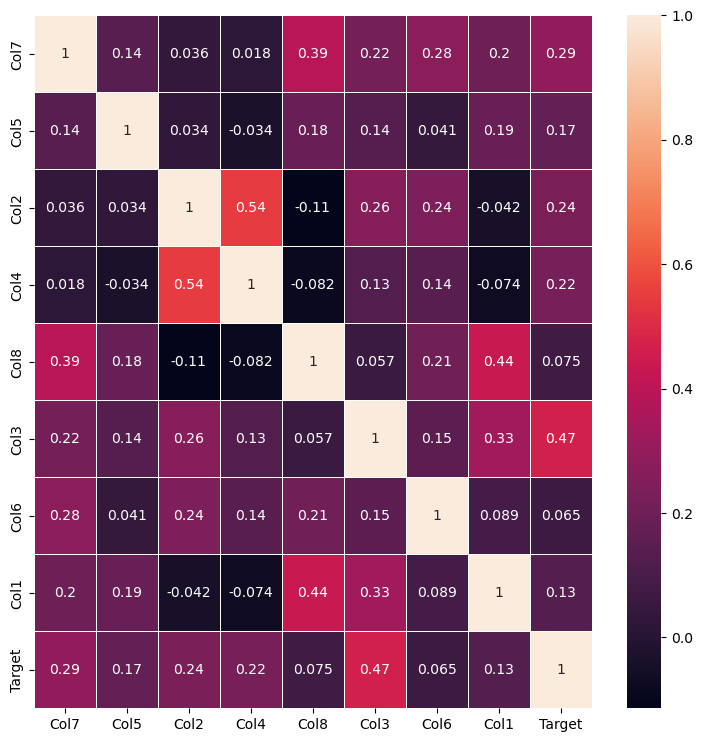

In [1294]:
import seaborn as sb
fig, ax = plt.subplots(figsize=(9,9))
sb.heatmap(df.corr(), linewidth = 0.5, annot=True)

ANÁLISIS DE LOS RESULTADOS

Como se puede ver, el mapa de calor muestra varias relaciones significativas entre algunas características.

Para otros apartados, habrá que seleccionar N de las mejores columnas entre todas las posibles, respectivamente. Para saber qué columnas poseen una mayor/mejor correlación, se seleccionan todos los valores de la fila 'Target' y pasarlos a valor absoluto, y una vez hecho esto, seleccionar los N valores más altos.

- Col7:   |0.29|  =   0.29
- Col5:   |0.17|  =   0.17
- Col2:   |0.24|  =   0.24
- Col4:   |0.22|  =   0.22
- Col8:   |0.075| =   0.075
- Col3:   |0.47|  =   0.47
- Col6:   |0.065| =   0.065
- Col1:   |0.13|  =   0.13

## 2.5 Histogramas de Distribución de las Características

El siguiente bloque de código crea un histograma para cada una de las 8 columnas que componen el dataset anonimizado, donde se visualiza la distribución de cada característica en función de su frecuencia.

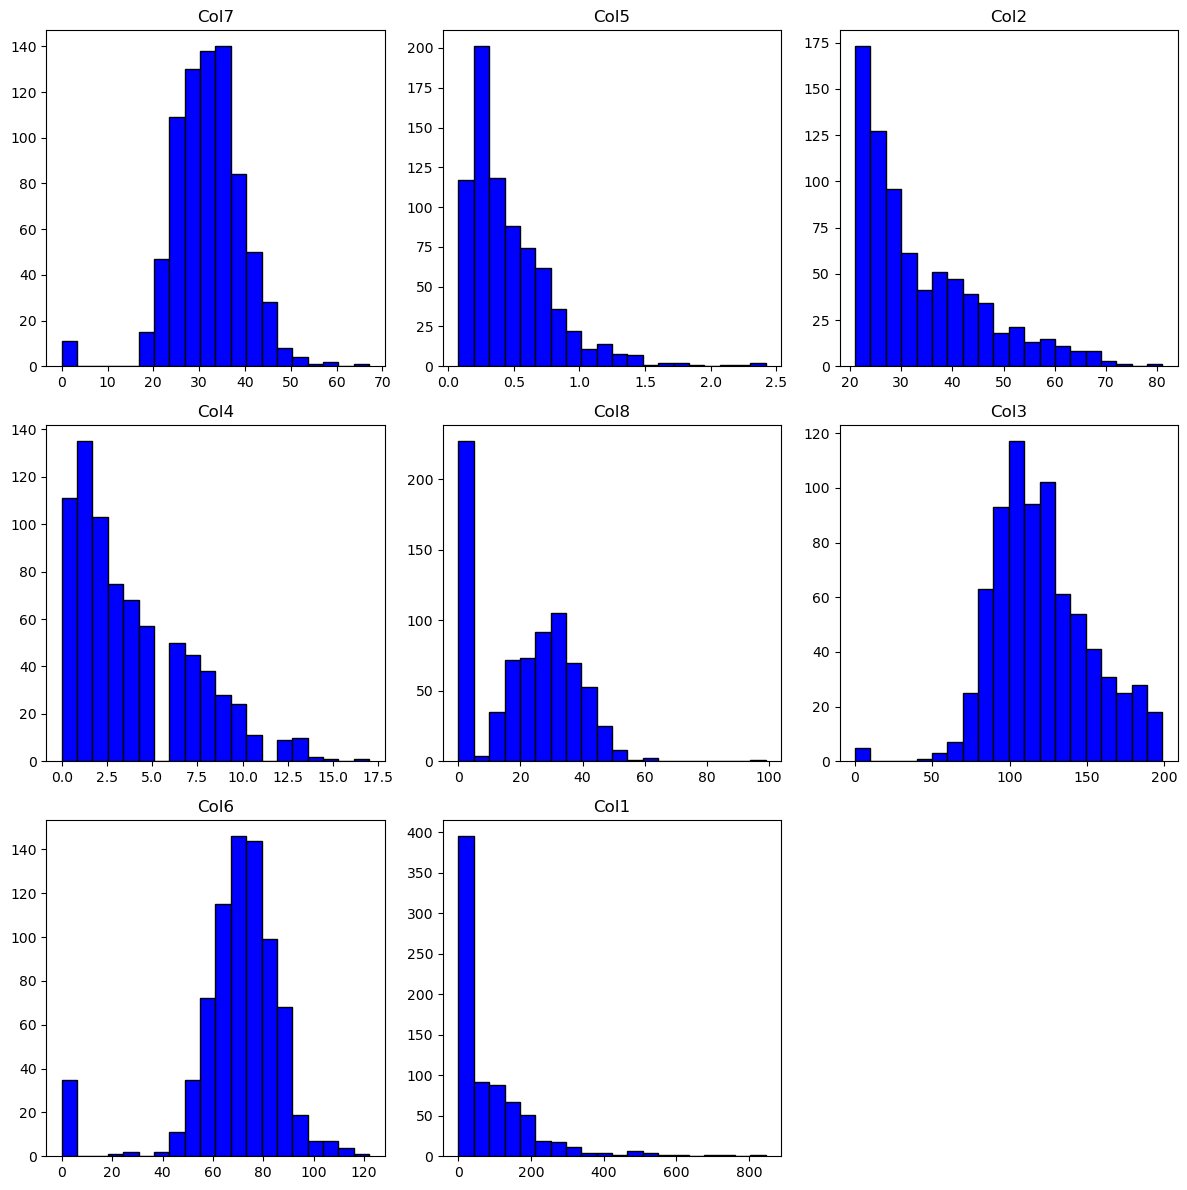

In [1295]:
columns = dataset_compression_anonymized.columns
fig = plt.figure(figsize=(12,12))
for i in range(0,8):
  ax = plt.subplot(3,3,i+1)
  ax.hist(dataset_compression_anonymized[columns[i]],bins = 20, color='blue', edgecolor='black')
  ax.set_title(dataset_compression_anonymized.head(0)[columns[i]].name)
plt.tight_layout()
plt.show()

# TEMA 3: Métodos de Compresión de Datos y Reducción Dimensional

## 3.1 Reducción Dimensional No Supervisada mediante Análisis de Componentes Principales (PCA)

### 3.1.1 Paso 1: Estandarización del Conjunto de Datos D-Dimensional

La estandarización es un paso previo necesario para el PCA (Principal Component Analysis), ya que asegura que todas las variables contribuyan de manera equitativa. Esto implica escalar los datos para que cada característica tenga media 0 y desviación estándar 1.

In [1296]:
# PÁGINA 143
from sklearn.model_selection import train_test_split
X, y = df.iloc[:, 0:-1].values, df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
# ----------

In [1297]:
# PÁGINA 55
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))
# ---------

Labels counts in y: [500 268]
Labels counts in y_train: [350 187]
Labels counts in y_test: [150  81]


### 3.1.2 Paso 2: Construcción de la Matriz de Covarianza

La matriz de covarianza refleja la relación de covarianza entre cada par de características en el conjunto de datos estandarizado. Esta matriz es crucial en PCA ya que permite identificar direcciones en el espacio de características con una mayor varianza.

In [1298]:
# PÁGINA 144
cov_mat = np.cov(X_train_std.T)
# ----------

ANÁLISIS DE LOS RESULTADOS

La matriz de covarianza tiene dimensiones dxd (8x8 en este caso), lo que implica que cada elemento muestra cómo van variando 2 características juntas. Si se tienen valores grandes en la diagonal, se sugiere que la varianza de las características es alta, mientras que el resto de valores hacen referencia a la covarianza entre cada par de características.

### 3.1.3 Paso 3: Descomposición de la Matriz de Covarianza en Vectores y Valores Propios

La descomposición en valores propios produce un conjunto de valores y vectores propios que describen la dirección y la magnitud de la varianza en todo el dataset.

In [1299]:
# PÁGINA 144
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n', eigen_vals)
# ----------

print('\nEigenvectors \n', eigen_vecs)


Eigenvalues 
 [2.062  1.7842 0.3812 0.4176 1.0525 0.6696 0.7858 0.862 ]

Eigenvectors 
 [[-0.4656 -0.0159 -0.2337 -0.1226 -0.3551 -0.7598  0.0849 -0.0528]
 [-0.2487 -0.1221  0.0522 -0.1059  0.5632 -0.037   0.1613 -0.7515]
 [-0.1568  0.6263 -0.4408  0.5963  0.095   0.0776 -0.0737 -0.113 ]
 [-0.0943  0.5733  0.311  -0.4796  0.0362 -0.0487 -0.5724 -0.0661]
 [-0.4518 -0.3272  0.4302  0.4871 -0.2138  0.1302 -0.4409 -0.0973]
 [-0.3835  0.2209  0.4401  0.089   0.3996 -0.0937  0.424   0.5042]
 [-0.3615  0.1925  0.0256 -0.2528 -0.5052  0.5468  0.4214 -0.1893]
 [-0.4539 -0.2666 -0.5217 -0.2812  0.2928  0.2971 -0.2861  0.3403]]


ANÁLISIS DE LOS RESULTADOS

Los valores propios (Eigenvalues) obtenidos indican la cantidad de varianza explicada por cada componente principal. 

Por otro lado, los vectores propios (Eigenvectors) asociados muestran la dirección de las nuevas componentes principales. Un valor propio grande implica que la componente asociada explica una parte significativa de la variación en los datos.

### 3.1.4 Paso 4: Ordenación de los Valores Propios en Orden Decreciente

Este paso permite clasificar los vectores propios de mayor a menor, dependiendo de la cantidad de varianza que comprenda cada uno.

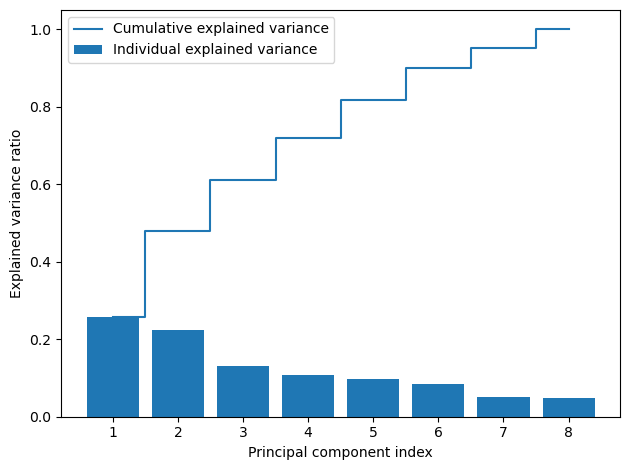

In [1300]:
# PÁGINA 145
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,9), var_exp, align='center', label='Individual explained variance')
plt.step(range(1,9), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
# ----------

ANÁLISIS DE LOS RESULTADOS

Este gráfico muestra la varianza de cada componente y su varianza acumulada. Si las dos primeras componentes comprenden, por ejemplo, el 80% de la varianza, significa que una gran parte de la información de los datos originales se retiene en esas componentes, lo que sugeriría reducir el dataset a esas 2 dimensiones.

### 3.1.5 Paso 5: Selección de k Vectores Propios correspondientes a los k Valores Propios Más Grandes

En este paso, se seleccionan las componentes principales que posean una mayor varianza.

In [1301]:
# PÁGINA 146
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
# ----------

ANÁLISIS DE LOS RESULTADOS

Se seleccionan los primeros k vectores propios, lo que implica elegir aquellas componentes que más información conserven del dataset original. Esto permite ayudar a reducir la dimensionalidad de una forma más efectiva.

### 3.1.6 Paso 6: Contrucción de la Matriz de Proyección W

Se crea la matriz de proyección W usando los vectores propios seleccionados en el paso anterior. Esta matriz se utilizará para transformar los datos originales al nuevo espacio de características reducido.

In [1302]:
# PÁGINA 146
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)
# ----------

Matrix W:
 [[-0.4656 -0.0159]
 [-0.2487 -0.1221]
 [-0.1568  0.6263]
 [-0.0943  0.5733]
 [-0.4518 -0.3272]
 [-0.3835  0.2209]
 [-0.3615  0.1925]
 [-0.4539 -0.2666]]


ANÁLISIS DE LOS RESULTADOS

Como se puede ver, la matriz W es de tamaño dxk (8x2 en este caso). Los valores de W obtenidos representan las direcciones de las 2 componentes principales más importantes, lo que facilitará la proyección del dataset a un subespacio de menor dimensionalidad.

### 3.1.7 Paso 7: Transformación del Dataset mediante la Matriz de Proyección W

In [1303]:
# PÁGINA 147
X_train_std[0].dot(w)
# ----------

array([ 2.0145, -0.9733])

In [1304]:
# PÁGINA 147
X_train_pca = X_train_std.dot(w)
# ----------

ANÁLISIS DE LOS RESULTADOS

Se utiliza W para proyectar los datos originales en un espacio de menor dimensión.

El conjunto de datos proyectado (X_train_pca) se ha convertido en una versión reducida de X_train_std, donde se han mantenido las 2 componentes principales. Este subespacio mantiene una gran parte de la información que tenía inicialmente, lo que permite visualizar y clasificar los datos de una forma más efectiva.

### 3.1.8 Visualización del Nuevo Espacio de Características

El gráfico resultante de este código muestra la separación de cada clase en función de las 2 componentes principales. Si se muestra una clara separación de las clases, se sugiere que PCA ha capturado bien las características discriminativas.

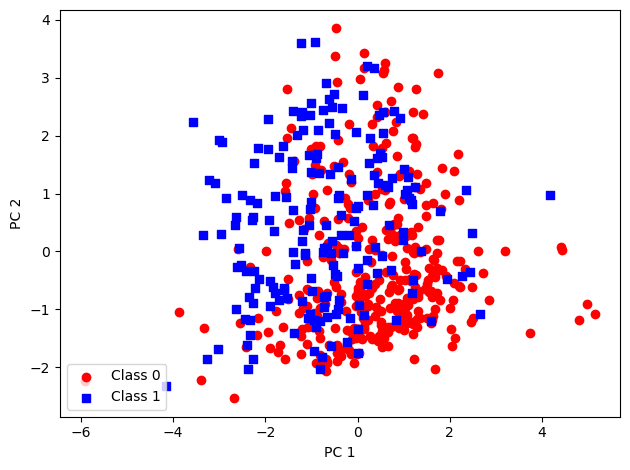

In [1305]:
# PÁGINA 148
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
                X_train_pca[y_train==l, 1],
                c=c, label=f'Class {l}', marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()
# ----------

In [1306]:
# PÁGINA 149
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
        y=X[y == cl, 1],
        alpha=0.8,
        c=colors[idx],
        marker=markers[idx],
        label=f'Class {cl}',
        edgecolor='black')
# ----------

### 3.1.9 Clasificación y Visualización de las Regiones de Decisión

Este código entrena un clasificador de Regresión Logística en los datos proyectados y visualiza las regiones de decisión en el espacio reducido.

/home/aalberto/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


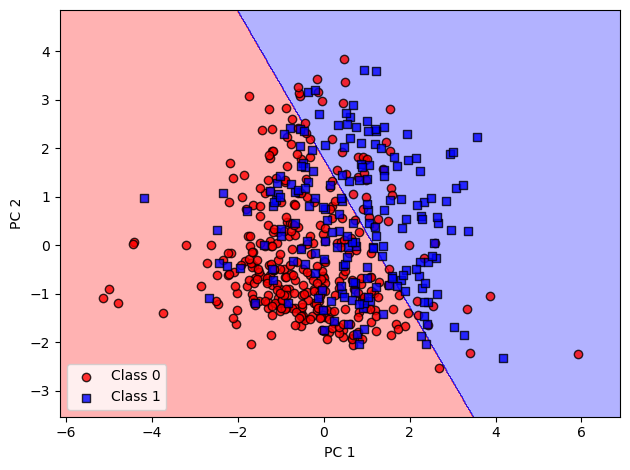

In [1307]:
# PÁGINA 150
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()
# ----------

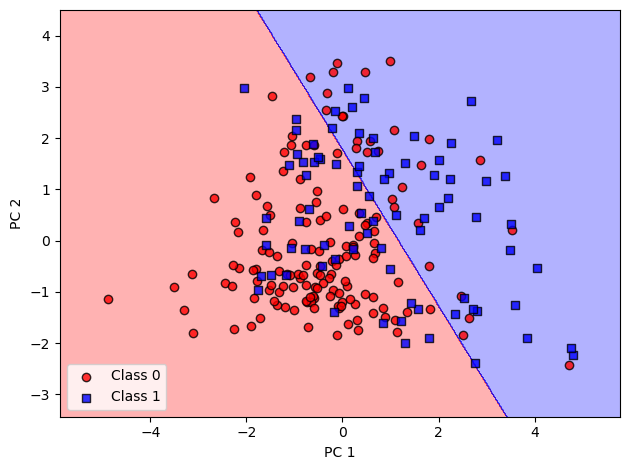

In [1308]:
# PÁGINA 151
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()
# ----------

ANÁLISIS DE LOS RESULTADOS

Las regiones de decisión indican cómo el modelo clasifica los datos en el espacio de las componentes principales. Si se observan márgenes claros entre las clases, se tiene una señal de que el clasificador logra una buena separación en el espacio reducido.

### 3.1.10 Explicación de la Varianza Total

Se aplica PCA con todas las componentes para ver la varianza explicada por cada una y cómo contribuyen al total. En este caso, los valores de pca.explained_variance_ratio_ indican qué proporción de la varianza comprende cada componente. Esto ayuda a decidir cuántas componentes se deben usar para mantener un nivel de información suficiente en los datos.

In [1309]:
# PÁGINA 151
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_
# ----------

array([0.2573, 0.2226, 0.1313, 0.1076, 0.098 , 0.0835, 0.0521, 0.0476])

### 3.1.11 Carga de los Componentes Principales

Y por último, se calculan las cargas de las componentes principales, las cuales indican cómo cada característica original contribuye a los nuevos componentes.

In [1310]:
# PÁGINA 152
loadings = eigen_vecs * np.sqrt(eigen_vals)
# ----------

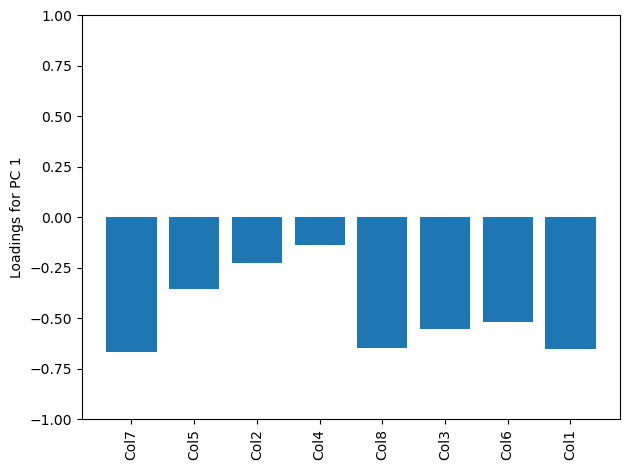

In [1311]:
# PÁGINA 152
fig, ax = plt.subplots()
ax.bar(range(8), loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(8))
ax.set_xticklabels(df.columns[0:-1], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()
# ----------

In [1312]:
# PÁGINA 153
sklearn_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
# ----------

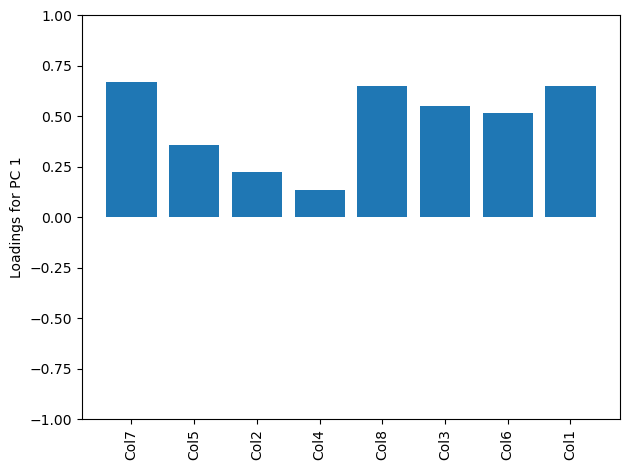

In [1313]:
# PÁGINA 153
fig, ax = plt.subplots()
ax.bar(range(8), sklearn_loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(8))
ax.set_xticklabels(df.columns[0:-1], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()
# ----------

ANÁLISIS DE LOS RESULTADOS

Las cargas cercanas a 1 o -1 indican qué características tienen una fuerte relación con cada una de las componentes principales. Esto permite interpretar qué variables originales tienen más influencia en cada componente.

## 3.2 Compresión de Datos Supervisada mediante Análisis Discriminante Lineal (LDA)

### 3.2.1 Paso 1: Estandarización del Conjunto de Datos D-Dimensional

La estandarización es un paso previo necesario para el LDA (Linear Discriminant Analysis), ya que éste depende de la varianza relativa de las características. Esto implica escalar los datos para que cada característica tenga media 0 y desviación estándar 1.

In [1314]:
# PÁGINA 143
from sklearn.model_selection import train_test_split
X, y = df.iloc[:, 0:-1].values, df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
# ----------

In [1315]:
# PÁGINA 55
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))
# ---------

Labels counts in y: [500 268]
Labels counts in y_train: [350 187]
Labels counts in y_test: [150  81]


### 3.2.2 Paso 2: Cálculo del Vector Medio D-Dimensional para cada Clase

Este paso calcula el vector medio para cada clase, lo que permite representar cada clase en el espacio de características.

In [1316]:
# PÁGINA 156
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(0, 2):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print(f'MV {label}: {mean_vecs[label - 1]}\n')
# ----------

MV 0: [-0.2311 -0.1178 -0.1745 -0.1791 -0.0634 -0.3381 -0.0426 -0.0632]

MV 1: [-0.2311 -0.1178 -0.1745 -0.1791 -0.0634 -0.3381 -0.0426 -0.0632]



ANÁLISIS DE LOS RESULTADOS

Cada uno de los vectores medios obtenidos (MV 0 y MV 1 en este caso) representan el centroide de cada clase en el espacio de características estandarizado. Los vectores medios obtenidos son fundamentales para poder calcular las matrices de dispersión entre clases y dentro de las mismas, lo que ayuda a maximizar la separabilidad entre clases.

### 3.2.3 Paso 3: Construcción de las Matrices de Dispersión dentro de clases (S_W) y entre Clases (S_B)

Estas matrices de dispersión son claves para LDA. La matriz S_W representa la dispersión de cada muestra respecto al centroide de su clase, mientras que S_B mide la dispersión entre los centroides de las diferentes clases.

In [1317]:
# PÁGINA 157
d = 8
S_W = np.zeros((d, d))
for label, mv in zip(range(0, 2), mean_vecs):
    class_scatter = np.zeros((d, d))
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter
print('Within-class scatter matrix: 'f'{S_W.shape[0]}x{S_W.shape[1]}')
# ----------

Within-class scatter matrix: 8x8


In [1318]:
# PÁGINA 157
print('Class label distribution:', np.bincount(y_train[1:]))
# ----------

Class label distribution: [349 187]


In [1319]:
# PÁGINA 158
d = 8
S_W = np.zeros((d, d))
for label, mv in zip(range(0, 2), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: 'f'{S_W.shape[0]}x{S_W.shape[1]}')
# ----------

Scaled within-class scatter matrix: 8x8


In [1320]:
# PÁGINA 158
mean_overall = np.mean(X_train_std, axis=0)
mean_overall = mean_overall.reshape(d, 1)
d = 8
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)
    S_B += n * (mean_vec - mean_overall).dot(
        (mean_vec - mean_overall).T)
print('Between-class scatter matrix: 'f'{S_B.shape[0]}x{S_B.shape[1]}')
# ----------

Between-class scatter matrix: 8x8


ANÁLISIS DE LOS RESULTADOS

La matriz de dispersión dentro de clases (S_W) representa la variabilidad dentro de cada clase. Si los valores obtenidos en S_W son bajos, se sugiere que la dispersión dentro de las clases es menor.

La matriz de dispersión entre clases (S_B) indica la variabilidad entre cada clase. Si la S_B obtenida es grande en comparación con S_W, se sugiere que las clases están bien clasificadas, lo que facilita la clasificación.

### 3.2.4 Paso 4: Cálculo de Vectores y Valores Propios de (S_W)^-1 * S_B

In [1321]:
# PÁGINA 158
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
# ----------

ANÁLISIS DE LOS RESULTADOS

Al resolver la ecuación de valores propios para (S_W)^-1 * S_B se obtienen vectores y valores propios que definen las direcciones y magnitudes de máxima separabilidad entre las clases.

Los valores propios obtenidos indican la capacidad de separabilidad de cada dirección encontrada. Un valor propio grande sugiere que su correspondiente vector propio proporciona una buena discriminación entre clases.

### 3.2.5 Paso 5: Ordenación de los Valores Propios en Orden Decreciente

Se ordenan los valores propios en orden descendente para seleccionar aquellas direcciones que maximicen la separabilidad entre clases.

In [1322]:
# PÁGINA 158
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
# ----------

# PÁGINA 159
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])
# ----------

Eigenvalues in descending order:

23.41712169788517
3.574910502078212e-15
3.574910502078212e-15
9.085415192895533e-16
7.152426171371067e-16
7.152426171371067e-16
5.24905708176207e-16
1.5159080014266038e-16


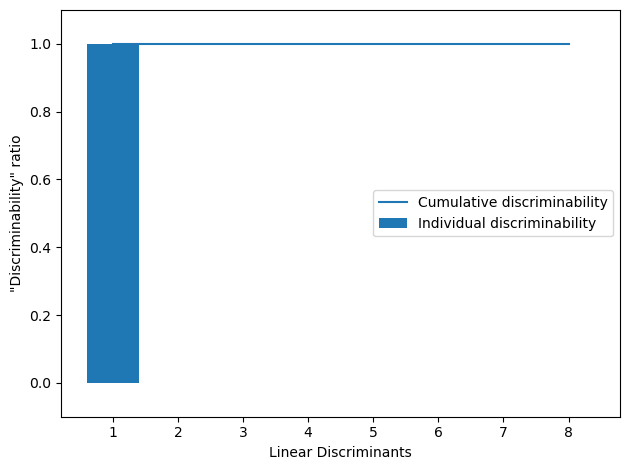

In [1323]:
# PÁGINA 159
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1,9), discr, align='center', label='Individual discriminability')
# ----------

# PÁGINA 160
plt.step(range(1,9), cum_discr, where='mid', label='Cumulative discriminability')
plt.ylabel('"Discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()
# ----------

ANÁLISIS DE LOS RESULTADOS

Los valores propios ordenados indican la importancia de cada dirección en términos de discriminabilidad, donde los valores más grandes muestran que las primeras direcciones seleccionadas en LDA capturan mejor la variabilidad entre clases, lo cual es útil para reducir dimensiones sin perder información importante.

### 3.2.6 Paso 6: Selección de los k Vectores Propios Más Grandes para Contruir la Matriz de Tranformación W

Se eligen los vectores propios correspondientes a los valores propios más altos para construir la matriz W, que proyectará los datos al subespacio de menor dimensión.

In [1324]:
# PÁGINA 160
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)
# ----------

Matrix W:
 [[ 0.478  -0.1759]
 [ 0.2027  0.7569]
 [ 0.1163 -0.0698]
 [ 0.3161 -0.078 ]
 [ 0.1376  0.1682]
 [ 0.7172 -0.1295]
 [-0.2123  0.1005]
 [-0.1963  0.1021]]


ANÁLISIS DE LOS RESULTAODS

La matriz de transformación W es de tamaño dxk (8x2 en este caso), donde k es el número de dimensiones seleccionadas. Esto permite reducir el espacio de características y maximizar la discriminación entre clases en el espacio transformado.

### 3.2.7 Paso 7: Proyección de Ejemplos en el Nuevo Subespacio usando la Matriz de Transformación W

En el gráfico resultante, las clases deberían aparecer separadas si LDA ha capturado bien las diferencias entre ellas. Una buena separación visual en las primeras dos componentes discriminantes sugiere que el subespacio reducido es efectivo para clasificar las clases.

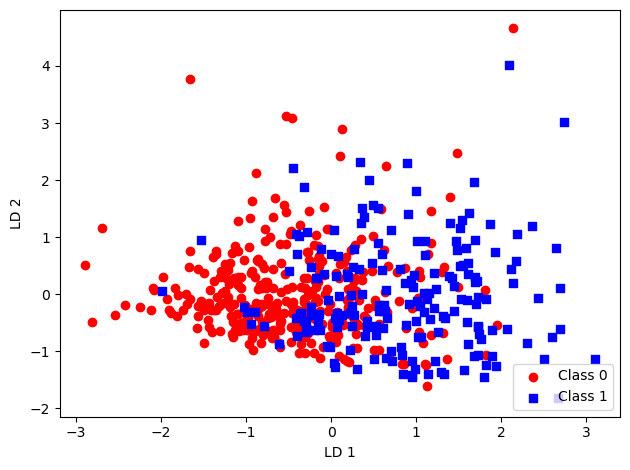

In [1325]:
# PÁGINA 161
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0],
                X_train_lda[y_train==l, 1], # * (-1)
                c=c, label=f'Class {l}', marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
# ----------

### 3.2.8 Clasificación y Visualización de las Regiones de Decisión en el Subespacio LDA

Y por último, se entrena un clasificador de Regresión Logística en el subespacio LDA y se visualizan las regiones de decisión tanto para el conjunto de entrenamiento como para el conjunto de prueba.

In [1326]:
# PÁGINA 162
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train_std, y_train)
# ----------

In [1327]:
# PÁGINA 162
# lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
# lr = lr.fit(X_train_lda, y_train)
# plot_decision_regions(X_train_lda, y_train, classifier=lr)
# plt.xlabel('LD 1')
# plt.ylabel('LD 2')
# plt.legend(loc='lower left')
# plt.tight_layout()
# plt.show()
# ----------

In [1328]:
# PÁGINA 163
# X_test_lda = lda.transform(X_test_std)
# plot_decision_regions(X_test_lda, y_test, classifier=lr)
# plt.xlabel('LD 1')
# plt.ylabel('LD 2')
# plt.legend(loc='lower left')
# plt.tight_layout()
# plt.show()
# ----------

ANÁLISIS DE LOS RESULTADOS

La visualización de las regiones de decisión en el subespacio LDA muestra cómo el clasificador separa las clases. Si las regiones están bien definidas y se ajustan a las clases, se suugiere que el modelo es efectivo para discriminar en el subespacio reducido.

## 3.3 Técnicas de Reducción Dimensional No Lineal

### 3.3.1 Carga y Visualización de Imágenes de Dígitos

Este bloque de código carga el conjunto de datos 'digits' y visualiza las primeras imágenes, lo que permite entender mejor la estructura de los datos antes de aplicar la reducción dimensional.

In [1329]:
# PÁGINA 166
from sklearn.datasets import load_digits
digits = load_digits()
# ----------

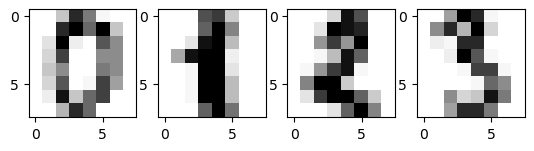

In [1330]:
# PÁGINA 166
fig, ax = plt.subplots(1, 4)
for i in range(4):
    ax[i].imshow(digits.images[i], cmap='Greys')
plt.show()
# ----------

ANÁLISIS DE LOS RESULTADOS

Se muestran las primeras 3 imágenes de dígitos en escala de grises, representando cada imagen como una cuadrícula de píxeles de 8x8. Esto permite verificar que se trata de muestras de dígitos manuscritos con distintas formas y tamaños, lo que da una primera idea de la variabilidad en el conjunto.

### 3.3.2 Obtención de Dimensiones del Dataset y Separación de Características y Etiquetas

En este paso, se obtiene la forma de los datos mediante digits.data.shape, y se separan las características (X_digits) y las etiquetas (y_digits), las cuales representan imágenes de dígitos y sus valores reales, respectivamente.

In [1331]:
# PÁGINA 166
digits.data.shape
# ----------

(1797, 64)

In [1332]:
# PÁGINA 167
y_digits = digits.target
X_digits = digits.data
# ----------

ANÁLISIS DE LOS RESULTADOS

El tamaño de los datos es 1797 filas y 64 columnas (una por cada píxel de las imágenes de 8x8). Cada conjunto tiene 64 características, que representan los niveles de intensidad de cada píxel en la imagen. Este alto número de características sugiere la necesidad de reducción dimensional para visualizar mejor los patrones.

### 3.3.3 Aplicación de t-SNE para Reducción Dimensional No Lineal

Este bloque de código aplica el algoritmo t-SNE para reducir la dimensionalidad de las imágenes de 64 a 2 dimensiones, usando como inicialización PCA. Esto permite visualizar la estructura de los datos en un plano bidimensional.

In [1333]:
# PÁGINA 167
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=123)
X_digits_tsne = tsne.fit_transform(X_digits)
# ----------

ANÁLISIS DE LOS RESULTADOS

La proyección t-SNE transforma los datos a 2 dimensiones, permitiendo visualizar las relaciones no lineales en el espacio reducido. Esto crea un mapa bidimensional en el que cada grupo representa un dígito diferente, idealmente formando grupos compactos y bien definidos.

### 3.3.4 Definición y Aplicación de la Función de Visualización

Este paso define una función plot_projection para visualizar los dígitos en el espacio reducido de 2 dimensiones. Cada dígito tiene un color distinto, y se añade una etiqueta en el centro de cada grupo, indicando el número correspondiente.

In [1334]:
# PÁGINA 167
import matplotlib.patheffects as PathEffects
def plot_projection(x, colors):
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    for i in range(10):
        plt.scatter(x[colors == i, 0],
                    x[colors == i, 1])
    for i in range(10):
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
# ----------

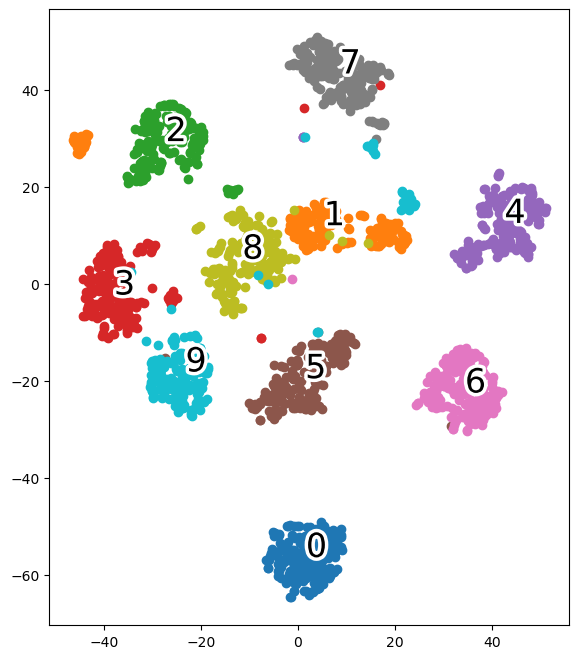

In [1335]:
# PÁGINA 168
plot_projection(X_digits_tsne, y_digits)
plt.show()
# ----------

ANÁLISIS DE LOS RESULTADOS

El gráfico resultante muestra los dígitos agrupados en el plano bidimensional, con cada dígito identificado mediante un color y una etiqueta numérica. Si los grupos de dígitos aparecen bien separados, esto indica que t-SNE ha capturado con éxito la estructura no lineal de los datos, lo que permite ver cómo los dígitos similares están más próximos entre sí en el espacio reducido. En caso de solapamiento entre algunos dígitos, se podría ajustar mediante perplexity o explorar otras técnicas de reducción no lineal para mejorar la separación.

# ANEXO: Convertir Jupyter Notebook a Fichero Python

## A.1 Script en el Directorio Actual

In [1336]:
! python .convert_notebook_to_script.py --input formulario_final.ipynb --output formulario_final.py

[NbConvertApp] Converting notebook formulario_final.ipynb to script
[NbConvertApp] Writing 31089 bytes to formulario_final.py


## A.2 Script en el Directorio Padre

In [1337]:
! python ../.convert_notebook_to_script.py --input formulario_final.ipynb --output formulario_final.py

[NbConvertApp] Converting notebook formulario_final.ipynb to script
[NbConvertApp] Writing 31089 bytes to formulario_final.py
